In [1]:
import radial
import angular

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exploring values of inversion error function

In [3]:
radial.Leaver_Cf_trunc_inversion(0.4-0.2j, 0., -2, 2, 4.+0.j, 0, 300, 1.+0.j)

(-3.7832264403820357-1.8368923380529323j)

In [4]:
Npts=100
omegar=np.arange(0.2, .5, .3/Npts)
omegai=np.arange(-0.2, -0., .2/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [5]:
leav1 = lambda omega: radial.Leaver_Cf_trunc_inversion(omega, 0., -2, 2, 4.+0.j, 0, 300, 0.j)
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

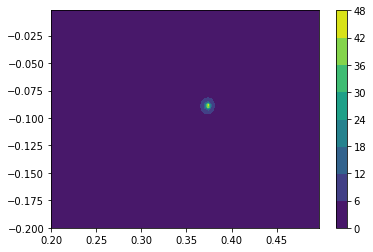

In [6]:
CS = plt.contourf(Or, Oi, 1/np.abs(Leavers))
plt.colorbar(CS)
plt.show()

In [7]:
angular.sep_const_closest(4., -2, 0.1, 2, 20)

(3.7259203780062347+0j)

In [464]:
Npts=120
orrange=[0., .4]
oirange=[-2.3,-0.75]
omegar=np.arange(orrange[0], orrange[1], (orrange[1]-orrange[0])/Npts)
omegai=np.arange(oirange[0], oirange[1], (oirange[1]-oirange[0])/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [465]:
a = 0.0
s = -2
m = 2
l = 2

n_inv = 6
Nr = 300
r_N = 0.
l_max = 20

leav1 = lambda omega: radial.Leaver_Cf_trunc_inversion(omega, a, s, m, 
                                                       angular.sep_const_closest(angular.SWSphericalH_A(s,l,m),
                                                                                 s, a*omega, m, l_max),
                                                       n_inv, Nr, r_N)

leavf = np.vectorize(leav1)
Leavers = leavf(Os)

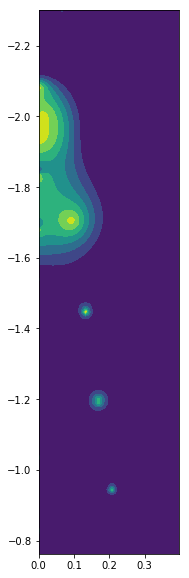

In [466]:
plt.figure(figsize=(10,10))
CS = plt.contourf(Or, Oi, np.exp(-np.abs(Leavers)))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
#plt.colorbar(CS)
plt.savefig("test.png", bbox_inches="tight", dpi=300)
plt.show()

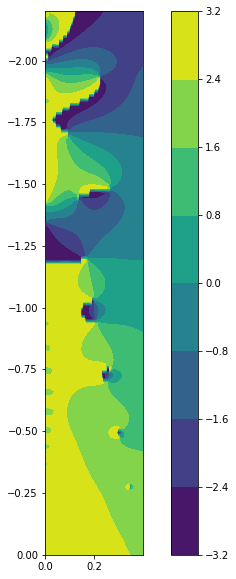

In [430]:
plt.figure(figsize=(10,10))
CS = plt.contourf(Or, Oi, np.angle(Leavers))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.colorbar(CS)
plt.show()

In [22]:
from scipy import optimize

In [23]:
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.-1.j

def leavA(x):
    omega = x[0] + 1.j*x[1]
    A = angular.sep_const_closest(A0, s, a*omega, m, l_max)
    Leav_err = radial.Leaver_Cf_trunc_inversion(omega, a, s, m, A, n_inv, Nr, r_N)
    return [np.real(Leav_err), np.imag(Leav_err)]

sol = optimize.root(leavA, [np.real(omega_guess), np.imag(omega_guess)], tol=1e-10)
print(sol)
omega_sol = sol.x[0] + 1.j*sol.x[1]
print(omega_sol)

    fjac: array([[-0.57359808, -0.81913689],
       [ 0.81913689, -0.57359808]])
     fun: array([-1.33226763e-14, -2.08721929e-14])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.81513595e-12, -8.49256196e-13])
       r: array([-37.83289639, -11.46901807,  -6.65014296])
  status: 1
 success: True
       x: array([ 0.34774125, -0.83259476])
(0.3477412539359394-0.8325947550362678j)


In [24]:
angular.sep_consts(s, a*omega_sol, m, l_max)

array([  3.64660074+1.21471602j,   9.82630392+0.6137243j ,
        17.91099677+0.38582177j,  27.95981518+0.27679539j,
        39.98983299+0.21636142j,  54.00938032+0.17936711j,
        70.0227435 +0.15505889j,  88.0322533 +0.13821883j,
       108.03924895+0.12606481j, 130.04453913+0.11700177j,
       154.04863361+0.11006122j, 180.05186591+0.10462704j,
       208.05446134+0.10029188j, 238.05657636+0.09677759j,
       270.05832233+0.0938889j , 304.05978018+0.09148542j,
       340.06100989+0.08946407j, 418.04949541+0.07276048j,
       378.06205594+0.08780761j])

In [25]:
angular.sep_consts(s, 0., 2, 20)

array([  4.+0.j,  10.+0.j,  18.+0.j,  28.+0.j,  40.+0.j,  54.+0.j,
        70.+0.j,  88.+0.j, 108.+0.j, 130.+0.j, 154.+0.j, 180.+0.j,
       208.+0.j, 238.+0.j, 270.+0.j, 304.+0.j, 340.+0.j, 378.+0.j,
       418.+0.j])

# Testing the nearby_root_finder class

In [26]:
import QNM_root_finder

In [27]:
tol = 1e-10
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.-1.j

In [28]:
finder = QNM_root_finder.nearby_root_finder(a=a, s=s, m=m, A_closest_to=A0,
                                            l_max=l_max, omega_guess=omega_guess,
                                            tol=tol, n_inv=n_inv, Nr=Nr, r_N=r_N)

In [29]:
finder.do_solve()

(0.34774125394091737-0.8325947549731965j)

In [30]:
finder.set_params(a=0.1)
finder.set_params(Nr=300)
o1 = finder.do_solve()
finder.set_params(Nr=301)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(-0.18951837039551553-0.9634123988656478j)
(6.821608555807046e-08-9.14337849877711e-08j)
1.1407704136265082e-07


In [31]:
finder.set_params(a=0.3)
finder.set_params(l_max=20)
o1 = finder.do_solve()
finder.set_params(l_max=21)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(0.24645724829090923-1.1069151100752648j)
(2.498001805406602e-16+0j)
2.498001805406602e-16


# Testing the QNM_seq_root_finder class

In [681]:
import logging
rl = logging.getLogger()
rl.setLevel(logging.WARN)

In [239]:
a_max = .99
tol=1e-10

ns=np.arange(0,8)
s=-2
l=2
m=2
seqs = [None] * len(ns)
for i,n in enumerate(ns):
    seqs[i] = QNM_root_finder.QNM_seq_root_finder(n=n, a_max=a_max, delta_a=5e-3, s=s, l=l, m=m)
    seqs[i].do_find_sequence()

In [210]:
from scipy import interpolate

ns = [4,5,6]
oms = [seqs[n].omega[0] for n in ns]
As =  [seqs[n].A[0] for n in ns]
interpo = interpolate.interp1d(ns, oms, kind='quadratic', bounds_error=False, fill_value='extrapolate')
interpA = interpolate.interp1d(ns, As,  kind='quadratic', bounds_error=False, fill_value='extrapolate')

oguess4 = interpo(7)
Aguess4 = interpA(7)

In [211]:
seqs[7] = QNM_root_finder.QNM_seq_root_finder(n=7, a_max=a_max, delta_a=5e-3, s=s, l=l, m=m, omega_guess=oguess4)
seqs[7].do_find_sequence()

In [173]:
a_max = .99
tol=1e-10

n=1
s=-2
l=3
ms=np.arange(-l,l+1)
seqs = [None] * len(ms)
for i,m in enumerate(ms):
    seqs[i] = QNM_root_finder.QNM_seq_root_finder(n=n, a_max=a_max, delta_a=5e-3, s=s, l=l, m=m)
    seqs[i].do_find_sequence()

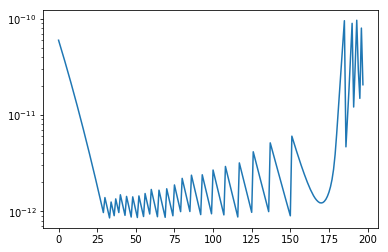

In [242]:
plt.plot(1.e-17+np.array(seqs[4].cf_err))
plt.gca().set_yscale('log')
plt.show()

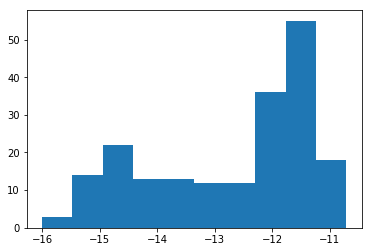

In [243]:
plt.hist(np.log10(1.e-16 + np.array(seqs[3].cf_err)))
plt.show()

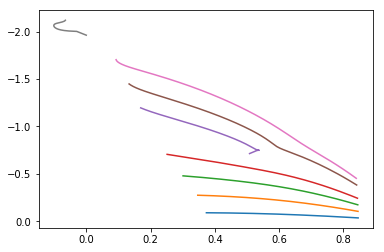

In [244]:
for seq in seqs:
    plt.plot(np.real(seq.omega), np.imag(seq.omega))
#plt.xlim(-1.5, 1.5)
#plt.ylim(-1.7,0.)
plt.gca().invert_yaxis()
plt.show()

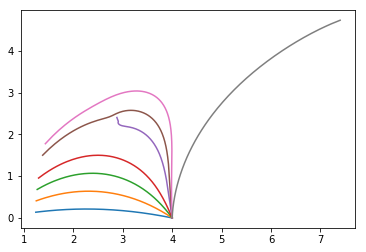

In [186]:
for seq in seqs:
    plt.plot(np.real(seq.A), np.imag(seq.A))
plt.show()

In [744]:
reload(QNM_root_finder)
reload(angular)

<module 'angular' from 'angular.pyc'>

# Testing the Schw_n_seq_finder class

In [778]:
n_max = 20
l_max = 20
ss = [-2, -1, 0]

Schw_dict = {}
Schw_err_dict = {}
tol = 1e-10

for s in ss:
    ls = np.arange(angular.l_min(s,0),l_max)
    for l in ls:
        Schw_seq = QNM_root_finder.Schw_n_seq_finder(s=s, l=l, l_max=l+10, n_max=n_max, tol=tol)
        try:
            Schw_seq.do_find_sequence()
        except:
            print("Failed at s={}, l={}".format(s, l))
        for n, (omega, cf_err) in enumerate(zip(Schw_seq.omega,Schw_seq.cf_err)):
            Schw_dict[(s,l,n)] = omega
            Schw_dict[(-s,l,n)] = omega
            Schw_err_dict[(s,l,n)] = cf_err
            Schw_err_dict[(-s,l,n)] = cf_err

In [779]:
len(Schw_dict.keys())

1880

In [780]:
import sys
sys.getsizeof(Schw_dict)

196888

In [781]:
sorted([ (s,l,n) for (s,l,n) in Schw_dict.keys() if (s==-2) and (l==2) ])

[(-2, 2, 0),
 (-2, 2, 1),
 (-2, 2, 2),
 (-2, 2, 3),
 (-2, 2, 4),
 (-2, 2, 5),
 (-2, 2, 6),
 (-2, 2, 7),
 (-2, 2, 8),
 (-2, 2, 9),
 (-2, 2, 10),
 (-2, 2, 11),
 (-2, 2, 12),
 (-2, 2, 13),
 (-2, 2, 14),
 (-2, 2, 15),
 (-2, 2, 16),
 (-2, 2, 17),
 (-2, 2, 18),
 (-2, 2, 19)]

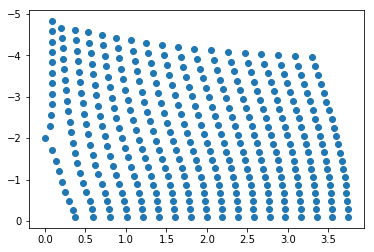

In [786]:
oms = [ Schw_dict[(s,l,n)] for (s,l,n) in Schw_dict.keys() if (s==-2)  ]
plt.scatter(np.real(oms),np.imag(oms))
plt.gca().invert_yaxis()
plt.show()